In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_NG_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2.0,7.0,8.0,2.0,9.0,11.0,7.0,7.0,1.0,8.0,5.0,6.0,NaN
1,4.0,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.0,7.0,9.0,NaN,9.0,7.0,10.0,NaN
2,7.0,10.0,8.0,7.0,4.0,8.0,8.0,5.0,10.0,11.0,2.0,8.0,2.0,5.0,5.0,10.0,NaN
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,13.0,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.0,NaN
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,NaN,9.0,3.0,8.0,3.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,8.0,3.0,4.0,10.0,7.0,8.0,12.0,10.0,9.0,2.0,9.0,2.0,6.0,NaN
19996,4.0,7.0,6.0,5.0,3.0,7.0,8.0,2.0,10.0,12.0,6.0,8.0,1.0,9.0,6.0,8.0,NaN
19997,4.0,NaN,4.0,6.0,4.0,7.0,8.0,7.0,4.0,10.0,7.0,6.0,3.0,9.0,3.0,7.0,NaN
19998,4.0,11.0,4.0,8.0,3.0,0.0,2.0,4.0,6.0,1.0,0.0,7.0,0.0,8.0,0.0,8.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	150
float64		column 2	200
float64		column 3	300
float64		column 4	300
float64		column 5	200
float64		column 6	200
float64		column 7	100
float64		column 8	150
float64		column 9	50
float64		column 10	250
float64		column 11	300
float64		column 12	350
float64		column 13	150
float64		column 14	200
float64		column 15	200
float64		column 16	100
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,19850.000000,19800.000000,19700.000000,19700.000000,19800.000000,19800.000000,19900.000000,19850.000000,19950.000000,19750.000000,19700.000000,19650.000000,19850.000000,19800.000000,19800.000000,19900.000000,0.0
mean,4.025542,7.035253,5.120761,5.371015,3.502929,6.900253,7.501809,4.625441,5.179198,8.282582,6.453096,7.926819,3.043778,8.336364,3.691111,7.803568,NaN
std,1.911831,3.299757,2.007672,2.253687,2.185473,2.017350,2.318728,2.691524,2.379381,2.480976,2.616140,2.072663,2.327606,1.540238,2.559902,1.614721,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,1.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,NaN


<AxesSubplot:>

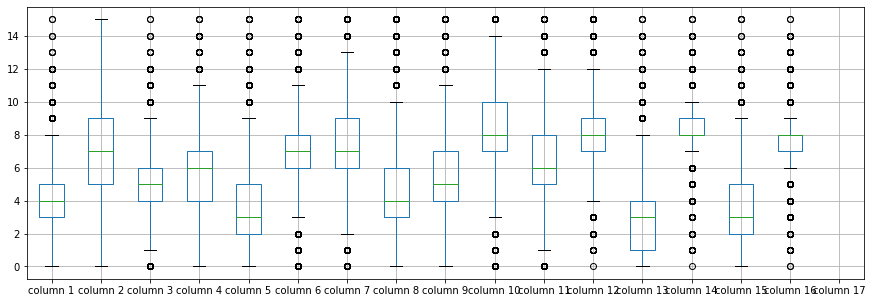

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.025542
column 2     7.035253
column 3     5.120761
column 4     5.371015
column 5     3.502929
column 6     6.900253
column 7     7.501809
column 8     4.625441
column 9     5.179198
column 10    8.282582
column 11    6.453096
column 12    7.926819
column 13    3.043778
column 14    8.336364
column 15    3.691111
column 16    7.803568
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.756999,0.850181,0.671065,0.616797,-0.031473,0.044213,0.016063,0.051620,0.148217,0.036006,-0.044539,0.488587,0.098174,0.271524,-0.103217,NaN
column 2,0.756999,1.000000,0.669658,0.822616,0.553501,0.045742,-0.039899,-0.025557,0.096628,0.160652,-0.052622,-0.007614,0.274419,0.000078,0.229891,-0.042430,NaN
column 3,0.850181,0.669658,1.000000,0.657512,0.764820,0.063216,0.024157,-0.098062,0.057423,0.113672,0.012321,-0.042909,0.556399,0.045070,0.260333,-0.116335,NaN
column 4,0.671065,0.822616,0.657512,1.000000,0.642267,0.043400,-0.021157,0.081418,0.059150,0.013018,-0.010712,0.026150,0.265734,0.026188,0.296337,-0.018680,NaN
column 5,0.616797,0.553501,0.764820,0.642267,1.000000,0.139019,-0.031118,-0.011910,-0.064407,-0.070394,-0.073506,-0.039080,0.627182,0.018809,0.491122,-0.060748,NaN
column 6,-0.031473,0.045742,0.063216,0.043400,0.139019,1.000000,-0.354650,-0.054754,-0.122514,0.082812,-0.343490,-0.033384,0.144071,-0.253270,0.126811,0.247300,NaN
column 7,0.044213,-0.039899,0.024157,-0.021157,-0.031118,-0.354650,1.000000,-0.118977,-0.050393,0.177559,0.597543,-0.267792,-0.036944,0.551669,-0.078909,-0.205909,NaN
column 8,0.016063,-0.025557,-0.098062,0.081418,-0.011910,-0.054754,-0.118977,1.000000,-0.186877,-0.316563,0.041685,0.081946,0.142628,-0.084295,0.007574,0.183574,NaN
column 9,0.051620,0.096628,0.057423,0.059150,-0.064407,-0.122514,-0.050393,-0.186877,1.000000,0.132624,-0.060394,0.117472,-0.383596,-0.053010,0.278775,-0.061460,NaN
column 10,0.148217,0.160652,0.113672,0.013018,-0.070394,0.082812,0.177559,-0.316563,0.132624,1.000000,0.055656,-0.108321,-0.175378,0.029589,-0.087517,-0.114148,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+4,17+4+4,17+4+4+4,17+4+4,17+4,17], vae_layer = False, seed = 40)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 78.9580130493164
Epoch: 1 , loss: 51.29464649353027
Epoch: 2 , loss: 46.522085714721676
Epoch: 3 , loss: 44.87944476318359
Epoch: 4 , loss: 43.755515939331055
Epoch: 5 , loss: 43.174215115356446
Epoch: 6 , loss: 42.74765388793945
Epoch: 7 , loss: 42.329336328125
Epoch: 8 , loss: 42.040829891967775
Epoch: 9 , loss: 42.03877285461426
Epoch: 10 , loss: 41.68169284667969
Epoch: 11 , loss: 41.56231660308838
Epoch: 12 , loss: 41.55234987335205
Epoch: 13 , loss: 41.40316546020508
Epoch: 14 , loss: 41.44209340820313
Epoch: 15 , loss: 41.18395870666504
Epoch: 16 , loss: 41.16877851867676
Epoch: 17 , loss: 41.101658882141116
Epoch: 18 , loss: 41.04798439331055
Epoch: 19 , loss: 40.7644624130249
Epoch: 20 , loss: 40.855902572631834
Epoch: 21 , loss: 40.874846356201175
Epoch: 22 , loss: 40.84651215057373
Epoch: 23 , loss: 40.75500051269531
Epoch: 24 , loss: 40.62387333984375
Epoch: 25 , loss: 40.57859026641846
Epo

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    8.000000
column 15    0.000000
column 16    8.000000
column 17   -0.002939
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,NaN
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.961298,0.0,0.0,0.0,NaN
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,NaN
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,NaN
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.913918,0.0,0.000000,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,NaN
19996,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,NaN
19997,0.0,-2.076479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,NaN
19998,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

174.8094825171422

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.04681791047520493

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6     10.000000
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17    -0.006518
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.000000,4.0,3.0,2.0,7.0,8.0,2.0,9.0,11.0,7.000000,7.0,1.000000,8.0,5.0,6.0,-0.006623
1,4.0,7.000000,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.0,7.000000,9.0,2.961298,9.0,7.0,10.0,-0.005079
2,7.0,10.000000,8.0,7.0,4.0,8.0,8.0,5.0,10.0,11.0,2.000000,8.0,2.000000,5.0,5.0,10.0,-0.003125
3,4.0,9.000000,5.0,7.0,4.0,7.0,7.0,13.0,1.0,7.0,6.000000,8.0,3.000000,8.0,0.0,8.0,-0.002059
4,6.0,7.000000,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,7.913918,9.0,3.000000,8.0,3.0,7.0,-0.000412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.000000,5.0,8.0,3.0,4.0,10.0,7.0,8.0,12.0,10.000000,9.0,2.000000,9.0,2.0,6.0,0.002174
19996,4.0,7.000000,6.0,5.0,3.0,7.0,8.0,2.0,10.0,12.0,6.000000,8.0,1.000000,9.0,6.0,8.0,-0.002278
19997,4.0,5.923521,4.0,6.0,4.0,7.0,8.0,7.0,4.0,10.0,7.000000,6.0,3.000000,9.0,3.0,7.0,-0.000309
19998,4.0,11.000000,4.0,8.0,3.0,0.0,2.0,4.0,6.0,1.0,0.000000,7.0,0.000000,8.0,0.0,8.0,-0.001733


In [21]:
imputations[-1].to_excel("Letter_NG_1(imp).xlsx", index=False, header=False)